# Trabalho de Grupo: Eigenfaces
## Trabalho realizado por: Daniela, Andreia, Diogo, Luís e Cristiana

In [341]:
#Importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import importlib as imp
import numpy.linalg as linalg
from PIL import Image
import glob
import math
import os
import cv2
import codigo_trabalho
imp.reload(codigo_trabalho)
from codigo_trabalho import *

In [342]:
#Importar as imagens de treino
path = "Treino/"

images = []
for filename in os.listdir(path):
    base = Image.open(f'Treino/{filename}').convert('L')
    images.append(base)


In [343]:
# Tamanho das imagens, isto é, 30 imagens para treino
M=len(images)
M

30

In [346]:
#Alterar as dimensões das imagens que serão utilizadas para treino, guardando numa lista
imagens_treino=[]
for filename in os.listdir(path):
    input_img = Image.open(f'Treino/{filename}').convert('L')
    input_img=input_img.resize((255,255))
    imagens_treino.append(input_img)
lista_imagens= imagens_treino
#Criar um array das imagens de treino
imagens_treino = np.array([imagens_treino[i].getdata() for i in range(M)])
imagens_treino

array([[159, 159, 159, ...,  20,  17,  14],
       [159, 159, 159, ..., 216, 207,  76],
       [159, 159, 159, ..., 221, 213, 214],
       ...,
       [204, 204, 203, ..., 145, 144, 160],
       [205, 203, 203, ..., 165, 170, 166],
       [204, 205, 205, ..., 154, 148, 147]])

In [347]:
#Alterar as dimensões das imagens que serão utilizadas para teste, guardando numa lista
path_teste = 'Teste/'
imagens_teste=[]
for filename in os.listdir(path_teste):
    input_img = Image.open(f'Teste/{filename}').convert('L')
    input_img=input_img.resize((255,255))
    imagens_teste.append(input_img)

In [348]:
# Implementacao do PCA
k, valores_proprios, vetores_proprios,phi, mean, variancia = pca(imagens_treino, 0.85)


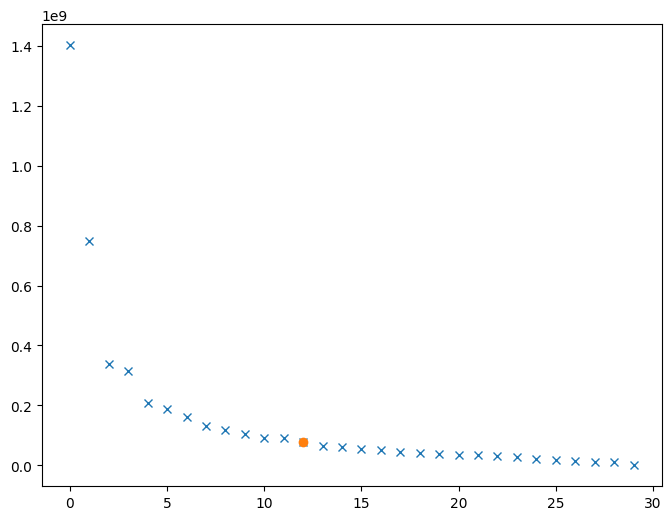

In [365]:
#Aplicar metodo Elbow para visualizar o melhor número de CP
plt.figure(figsize=(8,6))
t = np.arange(0,M,1)
plt.plot(t,valores_proprios,'x')
plt.plot(k,valores_proprios[k],'o')
plt.show()

In [366]:
#Calcular os coeficientes de projeção
coeficientes_proj = coeficientes_projecao(phi,vetores_proprios,imagens_treino.shape[0])

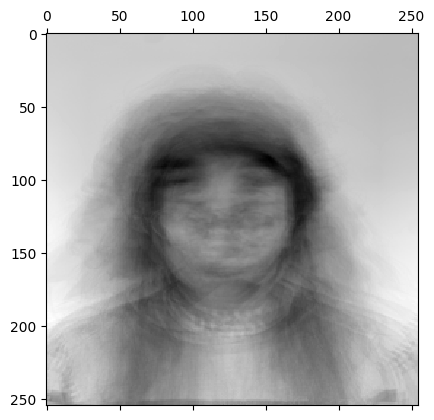

In [351]:
#Imagem média do dataset
display(plt.matshow(np.reshape(mean, (255,255)), cmap="gray"))

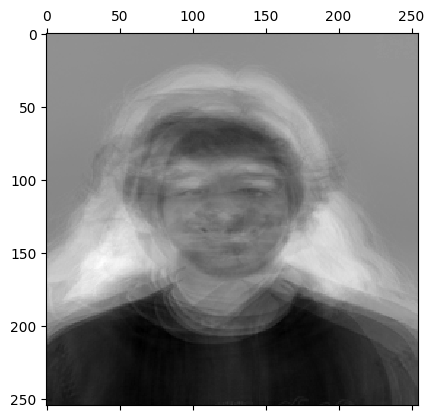

In [352]:
#Exemplo de um reconhecimento facial do dataset
display(plt.matshow(np.reshape(vetores_proprios.T[0], (255,255)), cmap="gray"))

# Testar o modelo

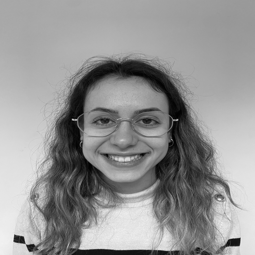

In [353]:
#Imagem da Daniela para teste
imagem = Image.open('Teste/d7.jpeg').convert("L")
imagem=imagem.resize((255,255))
imagem

Imagem nr.: 15
Distancia minima: 3187.91
Distancia máxima: 18709.51



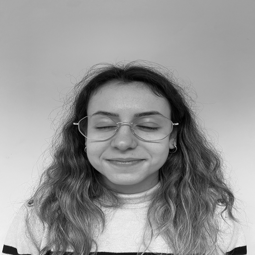

In [354]:
#Teste do reconhecimento facial da Daniela utilizando a distancia euclediana
distancia, coef_teste=testar(imagem, mean,vetores_proprios ,valores_proprios , M , coeficientes_proj ,"euclidian" )
img = -100
if np.size(distancia) > 0:
    img= lista_imagens[np.argmin(distancia)]
img

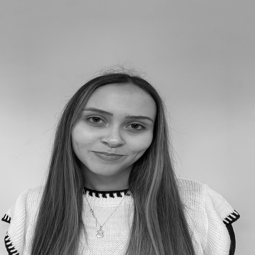

In [355]:
#Imagem da Andreia para teste
imagem = Image.open('Teste/a9.jpeg').convert("L")
imagem=imagem.resize((255,255))
imagem

Imagem nr.: 4
Distancia minima: 5093.14
Distancia máxima: 20602.41



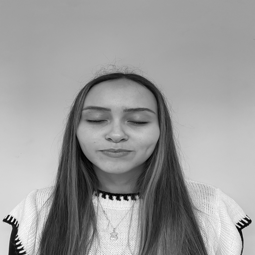

In [356]:
#Teste do reconhecimento da Andreia utilizando a distancia euclediana
distancia, coef_teste=testar(imagem, mean,vetores_proprios ,valores_proprios , M , coeficientes_proj ,"euclidian" )
img = -100
if np.size(distancia) > 0:
    img= lista_imagens[np.argmin(distancia)]
img

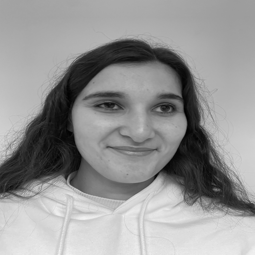

In [357]:
#Imagem da Cristiana para teste
imagem = Image.open('Teste/c7.jpeg').convert("L")
imagem=imagem.resize((255,255))
imagem

Imagem nr.: 10
Distancia minima: 0.3739
Distancia máxima: 1.3972



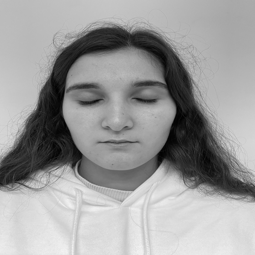

In [358]:
#Teste do reconhecimento facial da Cristiana utilizando a distancia Mahalanobis
distancia, coef_teste=testar(imagem, mean,vetores_proprios ,valores_proprios , M , coeficientes_proj ,"mahalanobis" )
img = -100
if np.size(distancia) > 0:
    img= lista_imagens[np.argmin(distancia)]
img

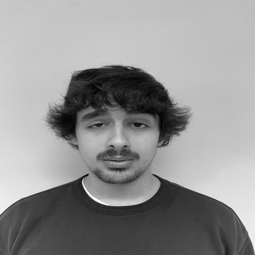

In [359]:
#Imagem do Lipe para teste
imagem = Image.open('Teste/l7.jpeg').convert("L")
imagem=imagem.resize((255,255))
imagem

Imagem nr.: 19
Distancia minima: 0.1508
Distancia máxima: 1.1825



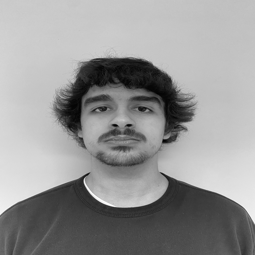

In [360]:
#Teste do reconhecimento facial do Lipe utilizando a distancia Mahalanobis
distancia, coef_teste=testar(imagem, mean,vetores_proprios ,valores_proprios , M , coeficientes_proj ,"mahalanobis" )
img = -100
if np.size(distancia) > 0:
    img= lista_imagens[np.argmin(distancia)]
img

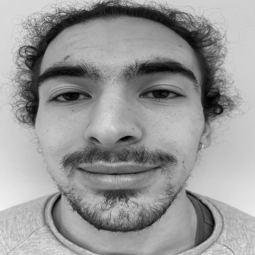

In [361]:
#Imagem do Diogo para teste
imagem = Image.open('Teste/r8.jpeg').convert("L")
imagem=imagem.resize((255,255))
imagem

Imagem nr.: 29
Distancia minima: 0.2005
Distancia máxima: 0.9471



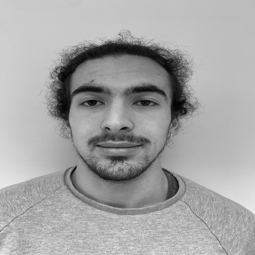

In [362]:
#Teste do reconhecimento facial do Diogo utilizando a distancia Mahalanobis
distancia, coef_teste=testar(imagem, mean,vetores_proprios ,valores_proprios , M , coeficientes_proj ,"mahalanobis" )
img = -100
if np.size(distancia) > 0:
    img= lista_imagens[np.argmin(distancia)]
img